# 🎬 Movie Rating Prediction Project  
## 📊 Data Science Internship - CodSoft  
By Kripa Sharma M

In [1]:
# Importing Libraries  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score  

# Visual Theme  
sns.set_theme(style="whitegrid", palette="flare")

In [2]:
# Load IMDb Dataset  
df = pd.read_csv("movies.csv",encoding='latin')  
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### Data Check and EDA

In [3]:
# Data Overview  
print(df.shape)  
print(df.columns)
df.info()  
df.isnull().sum()
df.dtypes

(15509, 10)
Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

### Data Cleaning & Preprocessing

In [4]:
# 🎯 We can’t predict if we don’t have a rating!
df = df.dropna(subset=['Rating'])

In [5]:
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].fillna('Unknown')

In [6]:
# Remove commas and convert to int
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

In [7]:
# Example duration like '2h 30min' to 150 mins 
import re

def duration_to_minutes(x):
    if pd.isnull(x):
        return np.nan
    hours = re.findall(r'(\d+)h', x)
    mins = re.findall(r'(\d+)min', x)
    total = 0
    if hours:
        total += int(hours[0]) * 60
    if mins:
        total += int(mins[0])
    return total

df['Duration_mins'] = df['Duration'].apply(duration_to_minutes)

In [8]:
df['Duration_mins'] = df['Duration_mins'].fillna(df['Duration_mins'].median())

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
#Data check
df.isnull().sum()
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration_mins
0,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0.0
1,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0.0
2,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0.0
3,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0.0
4,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0.0


### Feature Encoding & Train-Test Split

In [11]:
df_encoded = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

In [12]:
X = df_encoded.drop(['Name', 'Duration', 'Rating'], axis=1)  # Drop non-predictive columns
y = df_encoded['Rating']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Data: (6335, 12062) (6335,)
Testing Data: (1584, 12062) (1584,)


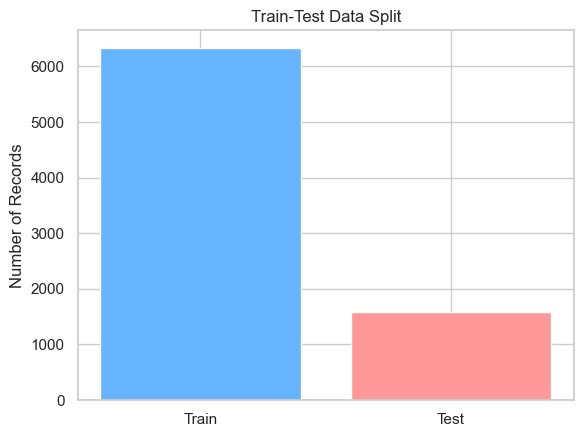

In [14]:
print("Training Data:", X_train.shape, y_train.shape)
print("Testing Data:", X_test.shape, y_test.shape)
plt.bar(['Train', 'Test'], [len(y_train), len(y_test)], color=['#66b3ff', '#ff9999'])
plt.title('Train-Test Data Split')
plt.ylabel('Number of Records')
plt.show()

### Model Training & Prediction

In [15]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

In [16]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"📊 {model_name} Results:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print("-" * 30)

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

📊 Linear Regression Results:
MAE: 13823347.706298385
MSE: 2880052536187278.0
RMSE: 53666120.93478788
R² Score: -1549127323750477.0
------------------------------
📊 Random Forest Regressor Results:
MAE: 0.8119728535353535
MSE: 1.1796683630050506
RMSE: 1.0861253900931747
R² Score: 0.3654780698846636
------------------------------


In [18]:
import pandas as pd
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    'R² Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
})


results.style.background_gradient(cmap='flare')

,Model,MAE,RMSE,R² Score
0,Linear Regression,13823347.706298,53666120.934788,-1549127323750477.000000
1,Random Forest,0.811973,1.086125,0.365478


### Vizualize Errors & Model Performance

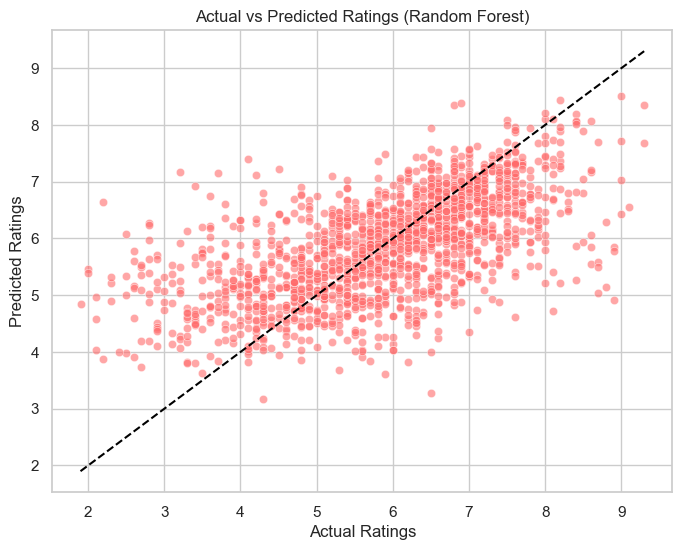

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color="#FF6B6B", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

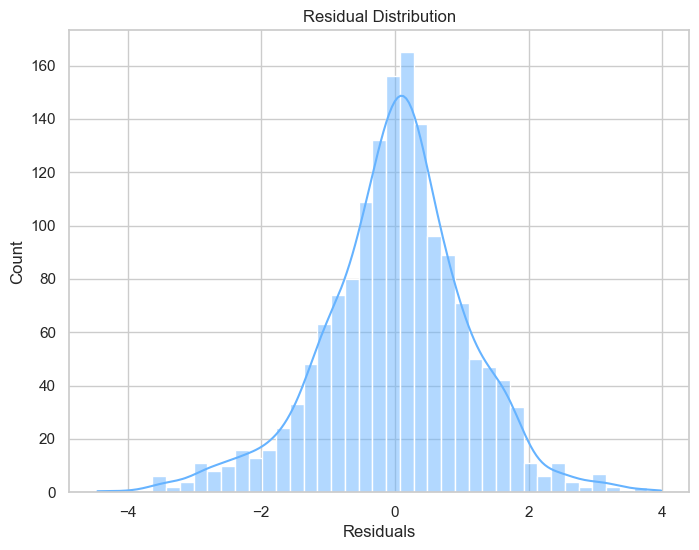

In [20]:
#Residuals Plot
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color="#66b3ff")
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.show()

In [21]:
results.style.background_gradient(cmap="Oranges")

,Model,MAE,RMSE,R² Score
0,Linear Regression,13823347.706298,53666120.934788,-1549127323750477.000000
1,Random Forest,0.811973,1.086125,0.365478
